# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Load Dataset

In [2]:

# Read the TSV file into a DataFrame with specified encoding
data = pd.read_csv("labeledTrainData.tsv", sep='\t', nrows=16300)

# Display the first few rows of the DataFrame
print(data.head())

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


# Data Exploratory Analysis

In [3]:
# columns names

data.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16300 non-null  object
 1   sentiment  16300 non-null  int64 
 2   review     16300 non-null  object
dtypes: int64(1), object(2)
memory usage: 382.2+ KB


In [5]:
data.nunique()

id           16300
sentiment        2
review       16253
dtype: int64

In [6]:
# shape of the dataset

data.shape

(16300, 3)

In [7]:
sentiment_counts = data['sentiment'].value_counts()

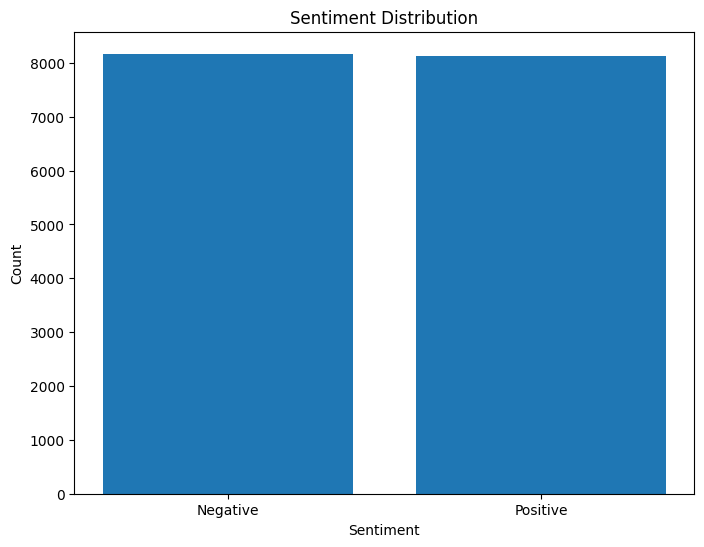

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(sentiment_counts.index, labels=['Negative', 'Positive'])
plt.show()

In [9]:
# find missing values

data.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

In [10]:
data['review']

0        With all this stuff going down at the moment w...
1        \The Classic War of the Worlds\" by Timothy Hi...
2        The film starts with a manager (Nicholas Bell)...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
16295    This has to be one of the worst movies I've ev...
16296    This was a very enjoyable film. A humorous, bu...
16297    What a terrible movie. The acting was bad, the...
16298    On Broadway, A Chorus Line was pure magic. Fro...
16299    Oh just what I needed,another movie about 19th...
Name: review, Length: 16300, dtype: object

#NLP Preprocessing Techniques

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#df["text"] = df["text"].astype(str)

In [15]:
# lowercasing

data['review']=data["review"].str.lower()

data['review']

0        with all this stuff going down at the moment w...
1        \the classic war of the worlds\" by timothy hi...
2        the film starts with a manager (nicholas bell)...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious 8...
                               ...                        
16295    this has to be one of the worst movies i've ev...
16296    this was a very enjoyable film. a humorous, bu...
16297    what a terrible movie. the acting was bad, the...
16298    on broadway, a chorus line was pure magic. fro...
16299    oh just what i needed,another movie about 19th...
Name: review, Length: 16300, dtype: object

In [16]:
# removal of punctuations

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["review"] = data["review"].apply(lambda text: remove_punctuation(text))
data['review'].head()

0    with all this stuff going down at the moment w...
1    the classic war of the worlds by timothy hines...
2    the film starts with a manager nicholas bell g...
3    it must be assumed that those who praised this...
4    superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [17]:
# removal of stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["review"] = data["review"].apply(lambda text: remove_stopwords(text))
data['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    film starts manager nicholas bell giving welco...
3    must assumed praised film greatest filmed oper...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

In [19]:


# find common words
from collections import Counter
cnt = Counter()
for text in data["review"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)



[('br', 37306),
 ('movie', 27221),
 ('film', 24755),
 ('one', 16592),
 ('like', 12967),
 ('good', 9457),
 ('even', 8282),
 ('would', 7881),
 ('really', 7704),
 ('time', 7688)]

In [20]:
# removal of frequent words


FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data['review'] = data["review"].apply(lambda text: remove_freqwords(text))
data['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    starts manager nicholas bell giving welcome in...
3    must assumed praised greatest filmed opera eve...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

In [21]:
# removal of rare words


n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["review"] = data["review"].apply(lambda text: remove_rarewords(text))
data['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    starts manager nicholas bell giving welcome in...
3    must assumed praised greatest filmed opera eve...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

In [22]:
# stemming

from nltk.stem.porter import PorterStemmer



stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["review"] = data["review"].apply(lambda text: stem_words(text))
data['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti 80 exploit ...
Name: review, dtype: object

In [23]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [24]:
# Lemmatization


import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["review"] = data["review"].apply(lambda text: lemmatize_words(text))
data['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti 80 exploit ...
Name: review, dtype: object

In [27]:
# remove numbers

data['review'] = data['review'].apply(lambda x: re.sub(r'\d+', '', x))

data['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti  exploit ho...
Name: review, dtype: object

In [28]:
# Remove punctuation and special characters
data['review'] = data['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

data['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti  exploit ho...
Name: review, dtype: object

In [29]:
from bs4 import BeautifulSoup

In [30]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

#Text embeddings-Feature Engineering

In [31]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [32]:
data['sentiment'].value_counts()

0    8169
1    8131
Name: sentiment, dtype: int64

In [33]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [34]:
X_train = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X_test = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [35]:
# Now you can proceed with the vectorization code
# TF IDF vectorization
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


# count vectorization
vectorizer_cvec = CountVectorizer()
X_train_cvec = vectorizer_cvec.fit_transform(X_train)
X_test_cvec = vectorizer_cvec.transform(X_test)

# Modelling building and evaluation

In [36]:
algorithms = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),

}

In [37]:
results_cvec = {}
for algorithm_name, algorithm in algorithms.items():
    algorithm.fit(X_train_cvec, y_train)
    y_pred = algorithm.predict(X_test_cvec)
    accuracy_cvec = accuracy_score(y_test, y_pred)
    results_cvec[algorithm_name] = accuracy_cvec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#Train and evaluate each algorithm using TF-IDF
results_tfidf = {}
for algorithm_name, algorithm in algorithms.items():
    algorithm.fit(X_train_tfidf, y_train)
    y_pred = algorithm.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred)
    results_tfidf[algorithm_name] = accuracy_tfidf

## model performance

In [39]:
results_df = pd.DataFrame({'Bag of Words': results_cvec, 'TF-IDF': results_tfidf})

# Display the results table
print(results_df)

                         Bag of Words    TF-IDF
Multinomial Naive Bayes      0.851227  0.849080
Random Forest                0.843252  0.841411
SVM                          0.853374  0.885583
Logistic Regression          0.861656  0.875767


In [40]:
# got accuracy 87.57% in Logistic regression (TF-IDF)

In [41]:
# Hyperparameter-Logistic Regression

In [42]:
# Define the hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300, 400, 500],
    'penalty': ['l1', 'l2']
}

In [43]:
# Create a logistic regression model
logreg = LogisticRegression()

# Perform grid search using cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2'}
Best Accuracy: 0.8748466257668711


In [44]:
# we got accuracy 87.48% after hypertuning, almost same.but it is not improved

# Deep Learning

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [47]:
# Convert sparse matrices to dense arrays
X_train_array = X_train_tfidf.toarray()
X_test_array = X_test_tfidf.toarray()

In [ ]:
# Create a deep learning model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_array.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Split the training data into training and validation sets manually
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_array, y_train, test_size=0.1, random_state=42)

# Train the model
model.fit(X_train_final, y_train_final, batch_size=32, epochs=5, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the test set
y_pred = model.predict_classes(X_test_array)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
